In [65]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
#Set your project path 

import os
project_path =  '/content/drive/My Drive/Colab Notebooks/caps/'

In [0]:
os.chdir(project_path)

In [68]:
pwd


'/content/drive/My Drive/Colab Notebooks/caps'

In [69]:
ls


input_data.xlsx              ticketCategorization2-001.h5
ticketCategorization-001.h5  ticketCategorization2-002.h5
ticketCategorization-002.h5  ticketCategorization2-003.h5
ticketCategorization-003.h5  ticketCategorization2-004.h5
ticketCategorization-004.h5  ticketCategorization2-005.h5
ticketCategorization-005.h5  ticketCategorization2-006.h5
ticketCategorization-006.h5  ticketCategorization2-007.h5
ticketCategorization-007.h5  ticketCategorization2-008.h5
ticketCategorization-008.h5  ticketCategorization2-009.h5
ticketCategorization-009.h5  ticketCategorization2-010.h5
ticketCategorization-010.h5  ticketCategorization2-011.h5
ticketCategorization-011.h5  ticketCategorization2-012.h5
ticketCategorization-012.h5  ticketCategorization2-013.h5
ticketCategorization-013.h5  ticketCategorization2-014.h5
ticketCategorization-014.h5  ticketCategorization2-015.h5
ticketCategorization-015.h5  ticketCategorization2-016.h5
ticketCategorization-016.h5  ticketCategorization2-017.h5
ticketCategori

In [70]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from pandas import read_excel

df =  read_excel('./input_data.xlsx', 'Sheet1')
df.head(10)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0


In [71]:
len(df)

8500

In [72]:
df.describe().transpose()

,count,unique,top,freq
Short description,8492,7481,password reset,38
Description,8499,7817,the,56
Caller,8500,2950,bpctwhsn kzqsbmtp,810
Assignment group,8500,74,GRP_0,3976


In [73]:
df.dtypes

Short description    object
Description          object
Caller               object
Assignment group     object
dtype: object

In [74]:
df.describe()

,Short description,Description,Caller,Assignment group
count,8492,8499,8500,8500
unique,7481,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


In [75]:
## let us count the tickets by group

df['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_73       1
GRP_64       1
GRP_61       1
GRP_35       1
GRP_70       1
Name: Assignment group, Length: 74, dtype: int64

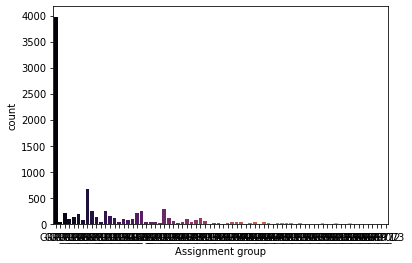

In [76]:
# Number of groups for overall ticker assignment using count plot
sns.countplot('Assignment group',data = df,palette='inferno')

Grp_0 has highest number of tickets assigned. Lot of fields with lower values.. lets figure out how many groups are there with samples < 10 





In [0]:
df.loc[df.groupby('Assignment group')['Assignment group'].transform('size') < 10 , 'Assignment group'] =  'SUBGROUP-X'

In [78]:
df['Assignment group'].value_counts()

GRP_0         3976
GRP_8          661
GRP_24         289
GRP_12         257
GRP_9          252
GRP_2          241
GRP_19         215
GRP_3          200
GRP_6          184
GRP_13         145
GRP_10         140
GRP_5          129
GRP_14         118
GRP_25         116
GRP_33         107
GRP_4          100
GRP_29          97
GRP_18          88
SUBGROUP-X      87
GRP_16          85
GRP_17          81
GRP_31          69
GRP_7           68
GRP_34          62
GRP_26          56
GRP_40          45
GRP_28          44
GRP_41          40
GRP_15          39
GRP_30          39
GRP_42          37
GRP_20          36
GRP_45          35
GRP_1           31
GRP_22          31
GRP_11          30
GRP_21          29
GRP_47          27
GRP_23          25
GRP_62          25
GRP_48          25
GRP_60          20
GRP_39          19
GRP_27          18
GRP_37          16
GRP_36          15
GRP_44          15
GRP_50          14
GRP_65          11
GRP_53          11
Name: Assignment group, dtype: int64

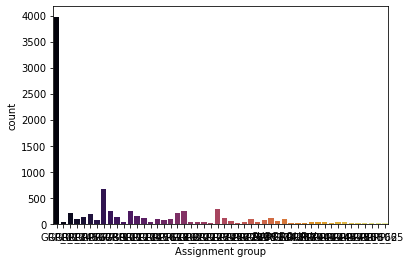

In [79]:
sns.countplot('Assignment group',data = df,palette='inferno')

In [0]:
### Description is missing for few of the tickets.. lets remove

In [81]:
df.isnull().values.any() ## Check for missing values

True

In [82]:
df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [0]:
# drop rows with missing values
df.dropna(inplace=True)

In [84]:
df.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [85]:
df.shape

(8491, 4)

In [0]:
# dropping duplicate rows
df.drop_duplicates(keep=False,inplace=True)

In [87]:
df.shape

(8351, 4)

In [0]:
## Lets convert the description, short description, caller and group to lower case

df['Short description'] = df['Short description'].apply(lambda x: x.lower())
df['Description'] = df['Description'].apply(lambda x: x.lower())
df['Caller'] = df['Caller'].apply(lambda x: x.lower())
df['Assignment group'] = df['Assignment group'].apply(lambda x: x.lower())


In [89]:
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,grp_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,grp_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,grp_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,grp_0
4,skype error,skype error,owlgqjme qhcozdfx,grp_0


In [90]:
df.shape

(8351, 4)

In [0]:
# dropping duplicate rows.... in case case sensitive duplicates were present earlier
df.drop_duplicates(keep=False,inplace=True)

In [92]:
df.shape

(8351, 4)

In [0]:
df_copy = df.copy()

In [0]:
## Remove mail Ids from the fields
mailId = r'\S*@\S*\s?'
df = df.replace(to_replace=mailId, value='', regex=True)

In [0]:
## Combine short description and description
df['TicketDescription'] = df['Short description'].str.cat(df['Description'],sep=" ")

In [0]:
## Combine caller
df['TicketDescription'] = df['TicketDescription'].str.cat(df['Caller'],sep=" ")

In [0]:
df = df.drop(['Short description', 'Description'], axis=1)

In [0]:
df = df.drop(['Caller'], axis=1) ## Delete the caller as well

In [99]:
df.head()

,Assignment group,TicketDescription
0,grp_0,login issue -verified user details.(employee# ...
1,grp_0,outlook \r\n\r\nreceived from: \n\r\nhello tea...
2,grp_0,cant log in to vpn \r\n\r\nreceived from: \n\r...
3,grp_0,unable to access hr_tool page unable to access...
4,grp_0,skype error skype error owlgqjme qhcozdfx


In [100]:
df.head()

,Assignment group,TicketDescription
0,grp_0,login issue -verified user details.(employee# ...
1,grp_0,outlook \r\n\r\nreceived from: \n\r\nhello tea...
2,grp_0,cant log in to vpn \r\n\r\nreceived from: \n\r...
3,grp_0,unable to access hr_tool page unable to access...
4,grp_0,skype error skype error owlgqjme qhcozdfx


In [0]:
## Decontract the words
import re
def decontract(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

In [102]:
 
df['TicketDescription'] = df['TicketDescription'].apply(lambda x: decontract(x))
df.head()

,Assignment group,TicketDescription
0,grp_0,login issue -verified user details.(employee# ...
1,grp_0,outlook \r\n\r\nreceived from: \n\r\nhello tea...
2,grp_0,cant log in to vpn \r\n\r\nreceived from: \n\r...
3,grp_0,unable to access hr_tool page unable to access...
4,grp_0,skype error skype error owlgqjme qhcozdfx


In [0]:
## cleanup mail headers content 

def getRegexList():
    regexList = []
    regexList += ['From:(.*)\r\n']  # from line
    regexList += ['Sent:(.*)\r\n']  # sent to line
    regexList += ['Received:(.*)\r\n']  # received data line
    regexList += ['To:(.*)\r\n']  # to line
    regexList += ['CC:(.*)\r\n']  # cc line
    regexList += ['Subject:']
    regexList += ['[\r\n]']  # \r\n
    regexList += ['[\w\d\-\_\.]+ @ [\w\d\-\_\.]+'] ## Email Ids
    return regexList

In [0]:
def cleanDataset(dataset, columnsToClean, regexList):
    for column in columnsToClean:
        for regex in regexList:
            dataset[column] = removeString(dataset[column], regex)
    return dataset

In [0]:
def removeString(data, regex):
    return data.str.lower().str.replace(regex.lower(), ' ')

In [0]:
columnsToClean = ['TicketDescription']
df = cleanDataset(df,columnsToClean, getRegexList())

In [0]:
df['TicketDescription'] = df['TicketDescription'].apply((lambda x: re.sub('[^a-zA-z0-9\s]',' ',x)))

In [108]:
df.head()

,Assignment group,TicketDescription
0,grp_0,login issue verified user details employee ...
1,grp_0,outlook received from hello team m...
2,grp_0,cant log in to vpn received from hi ...
3,grp_0,unable to access hr_tool page unable to access...
4,grp_0,skype error skype error owlgqjme qhcozdfx


In [109]:
## Clean stopwords and punctuations

import nltk
import string
import re
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [110]:
stopwords = nltk.corpus.stopwords.words('english')

def removeStopWordsPunctuations(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

df['TicketDescription'] = df['TicketDescription'].apply(lambda x: removeStopWordsPunctuations(x.lower()))

df.head()

,Assignment group,TicketDescription
0,grp_0,"[login, issue, verified, user, details, employ..."
1,grp_0,"[outlook, received, hello, team, meetings, sky..."
2,grp_0,"[cant, log, vpn, received, hi, cannot, log, vp..."
3,grp_0,"[unable, access, hrtool, page, unable, access,..."
4,grp_0,"[skype, error, skype, error, owlgqjme, qhcozdfx]"


In [111]:
df.head()

,Assignment group,TicketDescription
0,grp_0,"[login, issue, verified, user, details, employ..."
1,grp_0,"[outlook, received, hello, team, meetings, sky..."
2,grp_0,"[cant, log, vpn, received, hi, cannot, log, vp..."
3,grp_0,"[unable, access, hrtool, page, unable, access,..."
4,grp_0,"[skype, error, skype, error, owlgqjme, qhcozdfx]"


In [0]:
from nltk.stem.snowball import SnowballStemmer  ### Portstemmer vs snowballstemmer ... ?   Snowballstemmer is preferred over portstemmer for better results..

In [0]:
snowStem = nltk.SnowballStemmer("english")

In [114]:
def stemming(tokenized_text):
    text = [snowStem.stem(word) for word in tokenized_text]
    return text

df['TicketDescription'] = df['TicketDescription'].apply(lambda x: stemming(x))

df.head()

,Assignment group,TicketDescription
0,grp_0,"[login, issu, verifi, user, detail, employe, m..."
1,grp_0,"[outlook, receiv, hello, team, meet, skype, me..."
2,grp_0,"[cant, log, vpn, receiv, hi, cannot, log, vpn,..."
3,grp_0,"[unabl, access, hrtool, page, unabl, access, h..."
4,grp_0,"[skype, error, skype, error, owlgqjm, qhcozdfx]"


In [0]:
## Lematizer to be tried out... Not sure if we need to do this... People prefere to do just stemming vs lemmatization... 
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lematize_text(text):
  text = [lemmatizer.lemmatize(token, "v") for token in text] #Lemmatization
  return text

In [0]:
##df['TicketDescription'] = df['TicketDescription'].apply(lambda x: WordNetLemmatizer(x))
##df.head()

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [0]:
for idx,row in df.iterrows():
    row[0] = row[0].replace('rt',' ')
    
vocabSize = 10000
maxXFeatureSize = 200
tokenizer = Tokenizer(num_words=vocabSize, split=' ')
tokenizer.fit_on_texts(df['TicketDescription'].values)
X = tokenizer.texts_to_sequences(df['TicketDescription'].values)
X = pad_sequences(X, maxlen = maxXFeatureSize ) ### Add max len parameter

In [0]:
## Perform lable encoder... and convert to catagorical.. 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Assignment group'])
y_enc = le.transform(df['Assignment group'])

In [120]:
#le.inverse_transform([0, 0, 44, 2])
Y = pd.get_dummies(y_enc).values

Y[0].shape

(50,)

In [121]:

#Y = pd.get_dummies(df['Assignment group']).values
Y = pd.get_dummies(y_enc).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6680, 200) (6680, 50)
(1671, 200) (1671, 50)


In [122]:
Y[1]


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [0]:
from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
##X1, Y2 = smote.fit_sample(X,Y)

In [124]:
np.unique(np.argmax(Y_train, axis=1))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [0]:
from sklearn.utils import class_weight

#class_weigth = class_weight.compute_class_weight('balanced', np.unique(np.argmax(Y_train, axis=1)),Y_train)

##class_weigth = class_weight.compute_class_weight('balanced', np.uniquY_train.argmax(),Y_train)


In [126]:
## Lets try out LSTM model
from keras.layers import Dropout

embed_dim = 128
lstm_out = 256    ### 256... 128

model = Sequential()
model.add(Embedding(vocabSize+1, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.5))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.3)) ### 0.2, 0.3
#model.add(Dense(148,activation='relu'))
#model.add(Dropout(0.4))
model.add(Dense(50,activation='softmax'))  ### Note that they are 74 groups to which tickets are to be assigned ## Avpid hardcoding of 74
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 128)          1280128   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 200, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               394240    
_________________________________________________________________
dense_2 (Dense)              (None, 50)                12850     
Total params: 1,687,218
Trainable params: 1,687,218
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
# Using Keras Callbacks, save the model after every epoch
# Stop the training using early stopping if the validation loss does not improve for 12 epochs

from keras.callbacks import ModelCheckpoint

callbacks = [
    #EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5, verbose=0, mode='auto'),
    ModelCheckpoint('./ticketCategorizationC2-{epoch:03d}.h5', monitor='val_loss', verbose=1, save_best_only = True)
]

In [128]:
batch_size = 32
EPOCHS = 50
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs = EPOCHS, batch_size=batch_size, callbacks = callbacks,verbose = 2)  ### Add validation split..

Train on 5344 samples, validate on 1336 samples
Epoch 1/50
 - 153s - loss: 2.4132 - accuracy: 0.4927 - val_loss: 2.0180 - val_accuracy: 0.5584

Epoch 00001: val_loss improved from inf to 2.01800, saving model to ./ticketCategorizationC2-001.h5
Epoch 2/50
 - 152s - loss: 1.9248 - accuracy: 0.5488 - val_loss: 1.8560 - val_accuracy: 0.5778

Epoch 00002: val_loss improved from 2.01800 to 1.85596, saving model to ./ticketCategorizationC2-002.h5
Epoch 3/50
 - 154s - loss: 1.7100 - accuracy: 0.5801 - val_loss: 1.7612 - val_accuracy: 0.5943

Epoch 00003: val_loss improved from 1.85596 to 1.76124, saving model to ./ticketCategorizationC2-003.h5
Epoch 4/50
 - 157s - loss: 1.5309 - accuracy: 0.6044 - val_loss: 1.7578 - val_accuracy: 0.5749

Epoch 00004: val_loss improved from 1.76124 to 1.75779, saving model to ./ticketCategorizationC2-004.h5
Epoch 5/50
 - 165s - loss: 1.3785 - accuracy: 0.6291 - val_loss: 1.6861 - val_accuracy: 0.5966

Epoch 00005: val_loss improved from 1.75779 to 1.68611, savi

In [129]:

print('\nModel Performance: Log Loss and Accuracy on Test data')
testLoss, testAcc = model.evaluate(X_test, Y_test, batch_size = 1)
print('\nTesting Scores:: loss: {}, acc: {}\n'.format(testLoss, testAcc))


Model Performance: Log Loss and Accuracy on Test data
1671/1671 [==============================] - 49s 29ms/step

Testing Scores:: loss: 2.8026934808051043, acc: 0.6163973808288574



In [130]:
trainLoss, trainAcc = model.evaluate(X_train, Y_train, batch_size = 10)


6680/6680 [==============================] - 63s 10ms/step


In [131]:
print('\nTraining Scores::  loss: {}, acc: {}\n'.format(trainLoss, trainAcc))


Training Scores::  loss: 0.5462641252835181, acc: 0.9233533143997192



In [0]:
#y_pred = model.evaluate(X_test, Y_test, batch_size = 1)
from sklearn.metrics import classification_report, confusion_matrix


In [0]:
import numpy as np
rounded_labels=np.argmax(Y_test, axis=1)

In [0]:
y_pred = model.predict_classes(X_test)


In [145]:
report = classification_report(rounded_labels, y_pred, target_names=df['Assignment group'].unique() )
print(report)

              precision    recall  f1-score   support

       grp_0       0.80      0.83      0.82       786
       grp_1       0.20      0.17      0.18         6
       grp_3       0.50      0.46      0.48        26
       grp_4       0.00      0.00      0.00         5
       grp_5       0.36      0.51      0.43        39
       grp_6       0.50      0.27      0.35        30
       grp_7       0.40      0.33      0.36        24
       grp_8       0.21      0.57      0.31         7
       grp_9       0.33      0.28      0.30        18
      grp_10       1.00      0.83      0.91        12
      grp_11       0.50      0.53      0.51        17
      grp_12       0.35      0.32      0.33        41
      grp_13       0.46      0.33      0.38        49
      grp_14       0.11      0.10      0.11        10
      grp_15       0.50      0.40      0.44         5
      grp_16       0.00      0.00      0.00         3
      grp_17       0.00      0.00      0.00         6
      grp_18       0.92    

In [136]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, y_pred)
cm

array([[653,   0,   4, ...,   0,   3,   5],
       [  2,   1,   0, ...,   1,   0,   0],
       [  3,   0,  12, ...,   3,   0,   0],
       ...,
       [  0,   1,   1, ...,  90,   1,   0],
       [  4,   0,   0, ...,   2,  34,   1],
       [  6,   0,   1, ...,   0,   0,   3]])

In [0]:
### TBD
from sklearn import metrics

# Print the confusion matrix
##print(metrics.confusion_matrix(Y_test, y_pred))

# Print the precision and recall, among other metrics
##print(metrics.classification_report(Y_test, y_pred, digits=3))